In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
netflix_data = pd.read_csv("/Users/both/Desktop/Data_science_project/Netflix_projects/dataset/netflix_titles.csv")
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [11]:
#Clean up space at prefix and suffix
#Convert date_added from object to date time 
netflix_data['date_added_2'] = pd.to_datetime(netflix_data['date_added'].str.strip(),format='%B %d, %Y')

In [12]:
netflix_data['Year'] = netflix_data.date_added_2.dt.year
netflix_data['Month'] = netflix_data.date_added_2.dt.month

Check na on dataset

In [13]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
date_added_2      10
Year              10
Month             10
dtype: int64

In [14]:
netflix_data = netflix_data.dropna(axis=0)

In [15]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
date_added_2    0
Year            0
Month           0
dtype: int64

In [17]:
#Find the shape
netflix_data.shape

(5332, 15)

Plot content on Netflix category by Movie and TV shows

In [18]:
netflix_data['type'].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

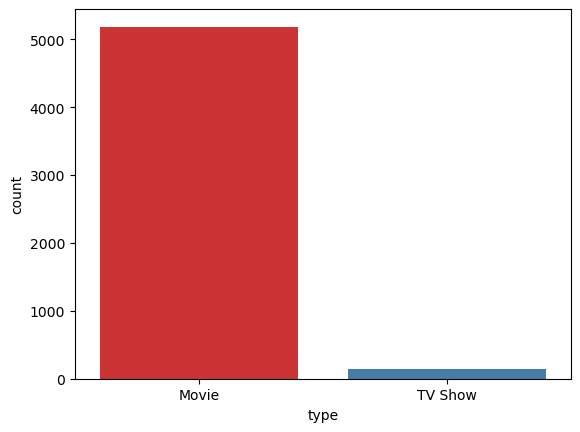

In [19]:
sns.countplot(x= 'type',data=netflix_data,palette="Set1")

Plot the movie and TV show by the time

In [59]:
df = netflix_data.groupby('Year')['type'].value_counts().unstack().fillna(0)
df

type,Movie,TV Show
Year,,
2008.0,1.0,0.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,3.0,0.0
2013.0,6.0,1.0
2014.0,14.0,0.0
2015.0,47.0,3.0
2016.0,195.0,7.0


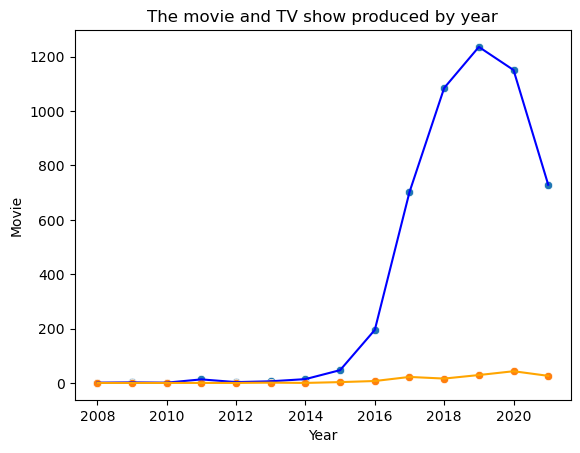

In [65]:
sns.scatterplot(data=df['Movie'])
sns.lineplot(df['Movie'], color='blue')

sns.scatterplot(data=df['TV Show'])
sns.lineplot(df['TV Show'], color='orange')
plt.title("The movie and TV show produced by year")
plt.show()

Find 10 Top Movie producers on Netflix

In [68]:
netflix_data_country = netflix_data[netflix_data['type']=='Movie']['country'].value_counts().rename_axis('Country').to_frame('counts')
netflix_data_country.reset_index(level=0,inplace=True)
netflix_data_country.head(10)

,Country,counts
0,United States,1819
1,India,868
2,United Kingdom,164
3,Canada,104
4,Egypt,90
5,Nigeria,84
6,Spain,84
7,Indonesia,76
8,Turkey,74
9,Japan,73


<AxesSubplot:xlabel='Country', ylabel='counts'>

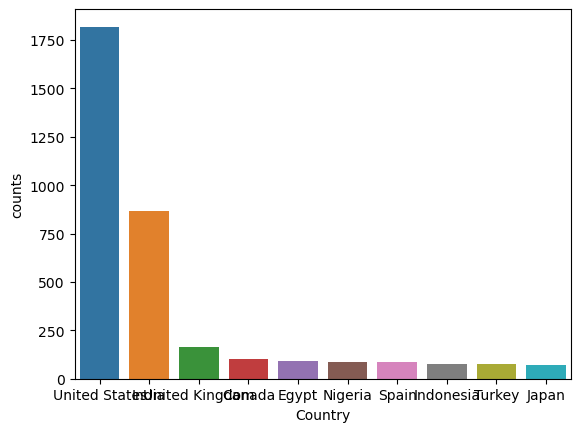

In [69]:
sns.barplot(x="Country",y="counts",data=netflix_data_country[:10])

Plot the number of content on the map

In [72]:
#country code
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [73]:
import plotly.graph_objects as go

In [91]:
# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=[country_codes.get(country, '') for country in netflix_data_country['Country'].str.lower()],
    z=netflix_data_country['counts'],
    text=netflix_data_country['Country'],
    colorscale='Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='No of contents'
))

In [93]:
# Set the layout of the map
fig.update_layout(
    title_text='No of contents on the Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    width=1280,
    height=720
)

# Show the map
fig.show()

Find the month and years when the producers released content on Netflix

In [17]:
df = netflix_data.groupby('Year')['Month'].value_counts().unstack().fillna(0).T
df

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,50.0,90.0,100.0,148.0,91.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,8.0,57.0,52.0,95.0,68.0,58.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,13.0,72.0,128.0,111.0,79.0,63.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,52.0,78.0,103.0,120.0,107.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,52.0,61.0,72.0,101.0,68.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,58.0,42.0,106.0,106.0,92.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,46.0,115.0,84.0,95.0,99.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,18.0,64.0,124.0,76.0,73.0,91.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,14.0,63.0,72.0,81.0,103.0,86.0


Text(0.5, 1.0, 'Netflix Heatmap content update')

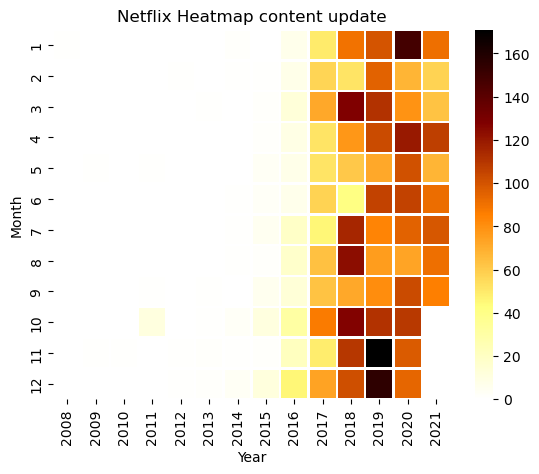

In [50]:
sns.heatmap(df,cmap='afmhot_r',linecolor='white',linewidths=1)
plt.title('Netflix Heatmap content update')


Analysis Movie rating

<AxesSubplot:xlabel='rating', ylabel='count'>

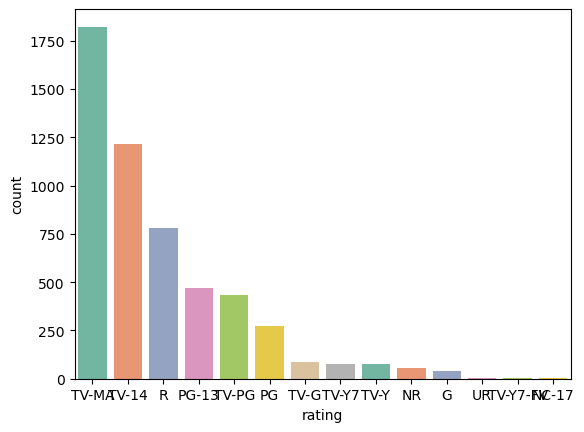

In [22]:
sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

Import IMDB data for further analysis Movie on Netflix

In [42]:
imdb_data = pd.read_csv("/Users/both/Desktop/Data science project/Netflix_projects/dataset/imdb_top_1000.csv", usecols=['Series_Title','IMDB_Rating','Released_Year','Genre','Runtime'])
imdb_data.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating
0,The Shawshank Redemption,1994,142 min,Drama,9.3
1,The Godfather,1972,175 min,"Crime, Drama",9.2
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0


In [43]:
netflix_movie=imdb_data.merge(netflix_data,left_on='Series_Title',right_on='title',how='inner')
netflix_movie=netflix_movie.sort_values(by='IMDB_Rating', ascending=False)
netflix_movie.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_2,Year,Month
0,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,s8405,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,2020-01-01,2020,1
2,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018-04-01,2018,4
1,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,2019-01-01,2019,1
3,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,2021-08-01,2021,8
4,The Lord of the Rings: The Two Towers,2002,179 min,"Action, Adventure, Drama",8.7,s8406,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,2020-01-01,2020,1


Analysis the duration of movie on Netflix

In [46]:
netflix_movie['Runtime'] = netflix_movie['Runtime'].str.replace('min','')
netflix_movie['Runtime'] = pd.to_numeric(netflix_movie['Runtime'])
netflix_movie['Runtime'].head(5)

0    201
2    195
1    154
3    148
4    179
Name: Runtime, dtype: int64

Plot density the see the distribution

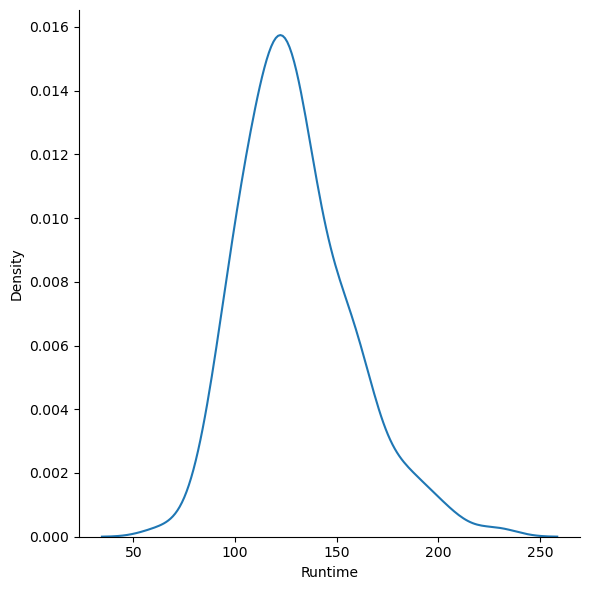

In [55]:
# Plot the distribution of runtime
sns.displot(
    data=netflix_movie,
    x="Runtime", 
    kind="kde", height=6,
    clip=(0, None),
)

<AxesSubplot:xlabel='rating', ylabel='Runtime'>

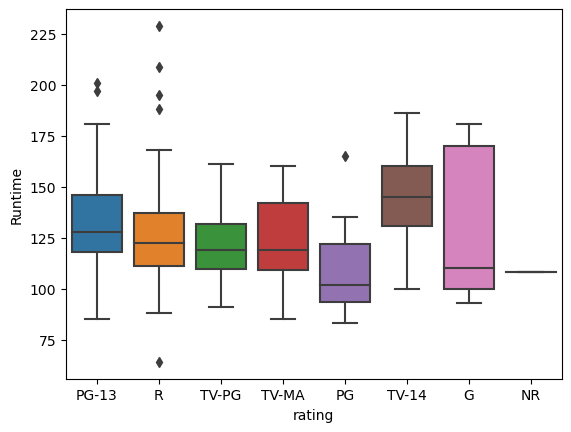

In [65]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot (x = 'rating',y="Runtime",
            data=netflix_movie)
